<a href="https://colab.research.google.com/github/shimyoubin/2025-1-myclass-BDA/blob/main/inclass/09w_B_wed_0430_easy_ch07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## 결측값 제거

In [1]:
import pandas as pd
import numpy as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'sex'   : ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, None]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [4]:
df.dropna(subset = ['score'])  # score 결측치 제거

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [5]:
df_nomiss = df.dropna(subset = ['score'])  # score 결측치 제거된 데이터 만들기
df_nomiss['score'] + 1

,score
0,6.0
1,5.0
2,4.0
3,5.0


In [6]:
df.dropna(subset = [2], axis = 1)

,score
0,5.0
1,4.0
2,3.0
3,4.0
4,NaN


In [7]:
df.dropna(subset = [3], axis = 1)

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [8]:
df_nomiss = df.dropna(subset = ['score', 'sex'])
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [9]:
df_nomiss2 = df.dropna()  # 모든 변수에 결측치 없는 데이터 추출
df_nomiss2

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [10]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [11]:
df['score'].mean() # 결측값은 제거(무시)하고 계산

np.float64(4.0)

In [12]:
df['score'].sum() # 결측값은 제거(무시)하고 계산

np.float64(16.0)

In [13]:
df.groupby('sex').agg(mean_score = ('score', 'mean'),
                      sum_score  = ('score', 'sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


In [14]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman', np.nan],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip', np.nan],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"), pd.NaT, pd.NaT]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT
3,NaN,NaN,NaT


In [15]:
df.isna()

,name,toy,born
0,False,True,True
1,False,False,False
2,False,False,True
3,True,True,True


In [16]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [17]:
df.dropna(axis='columns') # 아무것도 없는 빈 데이터프레임

""
0
1
2
3


In [18]:
# 하나라도 NaN인 경우, 행 제거
df.dropna(how='any')

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [19]:
# Keep only the rows with at least 2 non-NA values.
df.dropna(thresh=2) # 적어도 na가 아닌 값이 2개 이상인 행을 잔류

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [20]:
# Keep only the rows with at least 2 non-NA values.
df.dropna(thresh=1) # 적어도 na가 아닌 값이 2개 이상인 행을 잔류

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [21]:
# Keep only the rows with at least 2 non-NA values.
df.dropna(thresh=3) # 유효 값이 3개 이상인 행을 잔류

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [22]:
df.dropna(thresh=1, how='any') # 오류, 인자 thresh, how 동시 사용 불가

TypeError: You cannot set both the how and thresh arguments at the same time.

In [23]:
df.dropna(subset=['name', 'toy']) # 지정한 열에서 na인 행을 제거

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [25]:
df.dropna(subset=['toy'])

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [26]:
df.dropna(subset='toy')

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [27]:
df1 = pd.DataFrame(index = ['row1', 'row2', 'row3'])
df1

""
row1
row2
row3


In [28]:
df1.empty

True

In [29]:
df1 = pd.DataFrame(columns=['col1','col2','col3'])
df1

,col1,col2,col3


In [30]:
df1.empty

True

In [31]:
df1 = pd.DataFrame(index = ['row1', 'row2', 'row3'],
                   columns=['col1', 'col2', 'col3'])
df1

,col1,col2,col3
row1,NaN,NaN,NaN
row2,NaN,NaN,NaN
row3,NaN,NaN,NaN


In [32]:
df1.empty

False

In [33]:
df1 = pd.DataFrame(2,
                  index = ['row1', 'row2', 'row3'],
                  columns=['col1','col2','col3'])
df1

,col1,col2,col3
row1,2,2,2
row2,2,2,2
row3,2,2,2


### 결측값 대체하기

In [34]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 2.14 MiB | 5.33 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [35]:
exam = pd.read_csv('data/exam.csv')      # 데이터 불러오기
exam.loc[[2, 7, 14], ['math']] = np.nan  # 2, 7, 14행의 math에 NaN 할당
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [36]:
exam.loc[[2, 7, 14], ['math']]

,math
2,NaN
7,NaN
14,NaN


In [37]:
exam.loc[[2, 7, 14], 'math']

,math
2,NaN
7,NaN
14,NaN


In [38]:
round(exam['math'].mean(), 2)

np.float64(55.24)

In [39]:
import numpy as np
np.set_printoptions(precision=1)
np.array([np.pi])

array([3.1])

In [40]:
np.set_printoptions(precision=1, suppress = False)
np.array([0.0000001])

array([1.e-07])

In [41]:
np.set_printoptions(precision=1, suppress = True)
np.array([0.0000001])

array([0.])

In [42]:
exam['math'] = exam['math'].fillna(100)  # math가 NaN이면 55로 대체
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,100.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,100.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [43]:
exam = pd.read_csv('data/exam.csv')      # 데이터 불러오기
exam.loc[[2, 7, 14], ['math']] = np.nan  # 2, 7, 14행의 math에 NaN 할당
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [44]:
pd.set_option('display.precision', 2)
exam['math'] = exam['math'].fillna(exam['math'].mean())  # math가 NaN이면 55로 대체
exam

,id,nclass,math,english,science
0,1,1,50.00,98,50
1,2,1,60.00,97,60
2,3,1,55.24,86,78
3,4,1,30.00,98,58
4,5,2,25.00,80,65
5,6,2,50.00,89,98
6,7,2,80.00,90,45
7,8,2,55.24,78,25
8,9,3,20.00,98,15
9,10,3,50.00,98,45


In [45]:
exam['math'].isna().sum()  # 결측치 빈도 확인

np.int64(0)

## 이상치 제거하기

In [46]:
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [47]:
df['sex'].value_counts()

,count
sex,
1,3
2,2
3,1


In [48]:
df['sex'].value_counts().sort_index()

,count
sex,
1,3
2,2
3,1


In [49]:
df['score'].value_counts()

,count
score,
4,2
5,1
3,1
2,1
6,1


In [50]:
df['score'].value_counts().sort_index()

,count
score,
2,1
3,1
4,2
5,1
6,1


In [51]:
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [52]:
# score가 5보다 크면 NaN 부여
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [53]:
# sex, score 결측치 제거
# sex별 분리
# score 평균 구하기
df.dropna(subset = ['sex', 'score']).groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [54]:
df = pd.DataFrame([1])
df

,0
0,1


In [55]:
df = pd.DataFrame([1, 1, 2, 2])
df

,0
0,1
1,1
2,2
3,2


In [56]:
df = pd.DataFrame([[1, 1, 2, 2]])
df

,0,1,2,3
0,1,1,2,2


In [57]:
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 10, np.nan)  # 조건에 맞으면 문자 부여
df

,x1,x2
0,1,10.0
1,1,10.0
2,2,NaN
3,2,NaN


In [58]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [59]:
import numpy as np
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 'a', 'nan')  # Replace np.nan with a string 'nan'

df

,x1,x2
0,1,a
1,1,a
2,2,nan
3,2,nan


In [60]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,False
3,False,False


In [61]:
# 결측치로 만들 값에 문자 부여
df['x2'] = np.where(df['x1'] == 1, 'a', 'etc')
df

,x1,x2
0,1,a
1,1,a
2,2,etc
3,2,etc


In [62]:
# 'etc'를 NaN으로 바꾸기
df['x2'] = df['x2'].replace('etc', np.nan)
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


In [63]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [64]:
df2 = df.fillna(10)
df2

,x1,x2
0,1,a
1,1,a
2,2,10
3,2,10


In [65]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      4 non-null      int64 
 1   x2      4 non-null      object
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


In [66]:
type(df2.loc[2, 'x2'])

int

## 이상치 제거 - 극단적인 값

In [67]:
import pandas as pd
mpg = pd.read_csv('data/mpg.csv')
mpg.sample(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
111,hyundai,sonata,2.4,2008,4,manual(m5),f,21,31,r,midsize
177,toyota,4runner 4wd,4.0,2008,6,auto(l5),4,16,20,r,suv
32,chevrolet,malibu,2.4,1999,4,auto(l4),f,19,27,r,midsize
10,audi,a4 quattro,2.0,2008,4,auto(s6),4,19,27,p,compact
188,toyota,camry solara,2.4,2008,4,manual(m5),f,21,31,r,compact
144,nissan,altima,2.5,2008,4,manual(m6),f,23,32,r,midsize
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
82,ford,explorer 4wd,5.0,1999,8,auto(l4),4,13,17,r,suv
207,volkswagen,gti,2.0,1999,4,manual(m5),f,21,29,r,compact
168,subaru,impreza awd,2.5,1999,4,auto(l4),4,19,26,r,subcompact


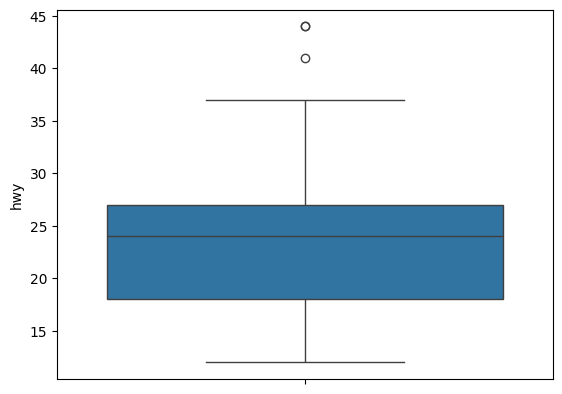

In [68]:
import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy');

### 박스상자의 구성요소
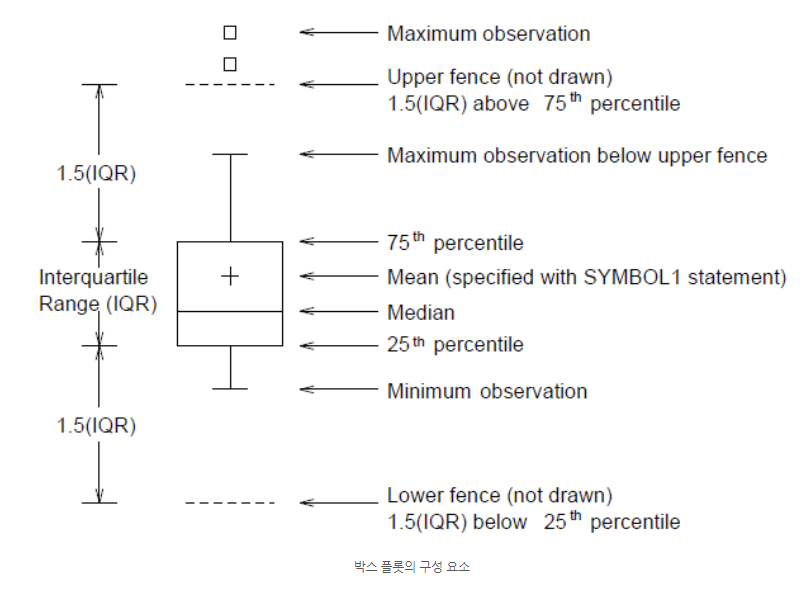

In [69]:
s = pd.Series([1, 2, 3, 4, 5])

In [70]:
s.quantile([.01, .25, .50, .75, 1])

,0
0.01,1.04
0.25,2.00
0.50,3.00
0.75,4.00
1.00,5.00


In [71]:
s.quantile(.50)

np.float64(3.0)

In [72]:
s.quantile([.25, .5, .75, 1])

,0
0.25,2.0
0.50,3.0
0.75,4.0
1.00,5.0


In [73]:
pct25, pct50, pct75 = mpg['hwy'].quantile([.25, .5, .75])
pct25

18.0

In [74]:
pct50, pct75

(24.0, 27.0)

In [75]:
iqr = pct75 - pct25
iqr

9.0

In [76]:
pct25 - 1.5 * iqr  # 하한

4.5

In [77]:
pct75 + 1.5 * iqr  # 상한

40.5

In [78]:
mpg['hwy'].describe()

,hwy
count,234.00
mean,23.44
std,5.95
min,12.00
25%,18.00
50%,24.00
75%,27.00
max,44.00


In [79]:
mpg['hwy'].describe()['25%']

np.float64(18.0)

## 결측값 확인

In [80]:
mpg.isna().sum()

,0
manufacturer,0
model,0
displ,0
year,0
cyl,0
trans,0
drv,0
cty,0
hwy,0
fl,0


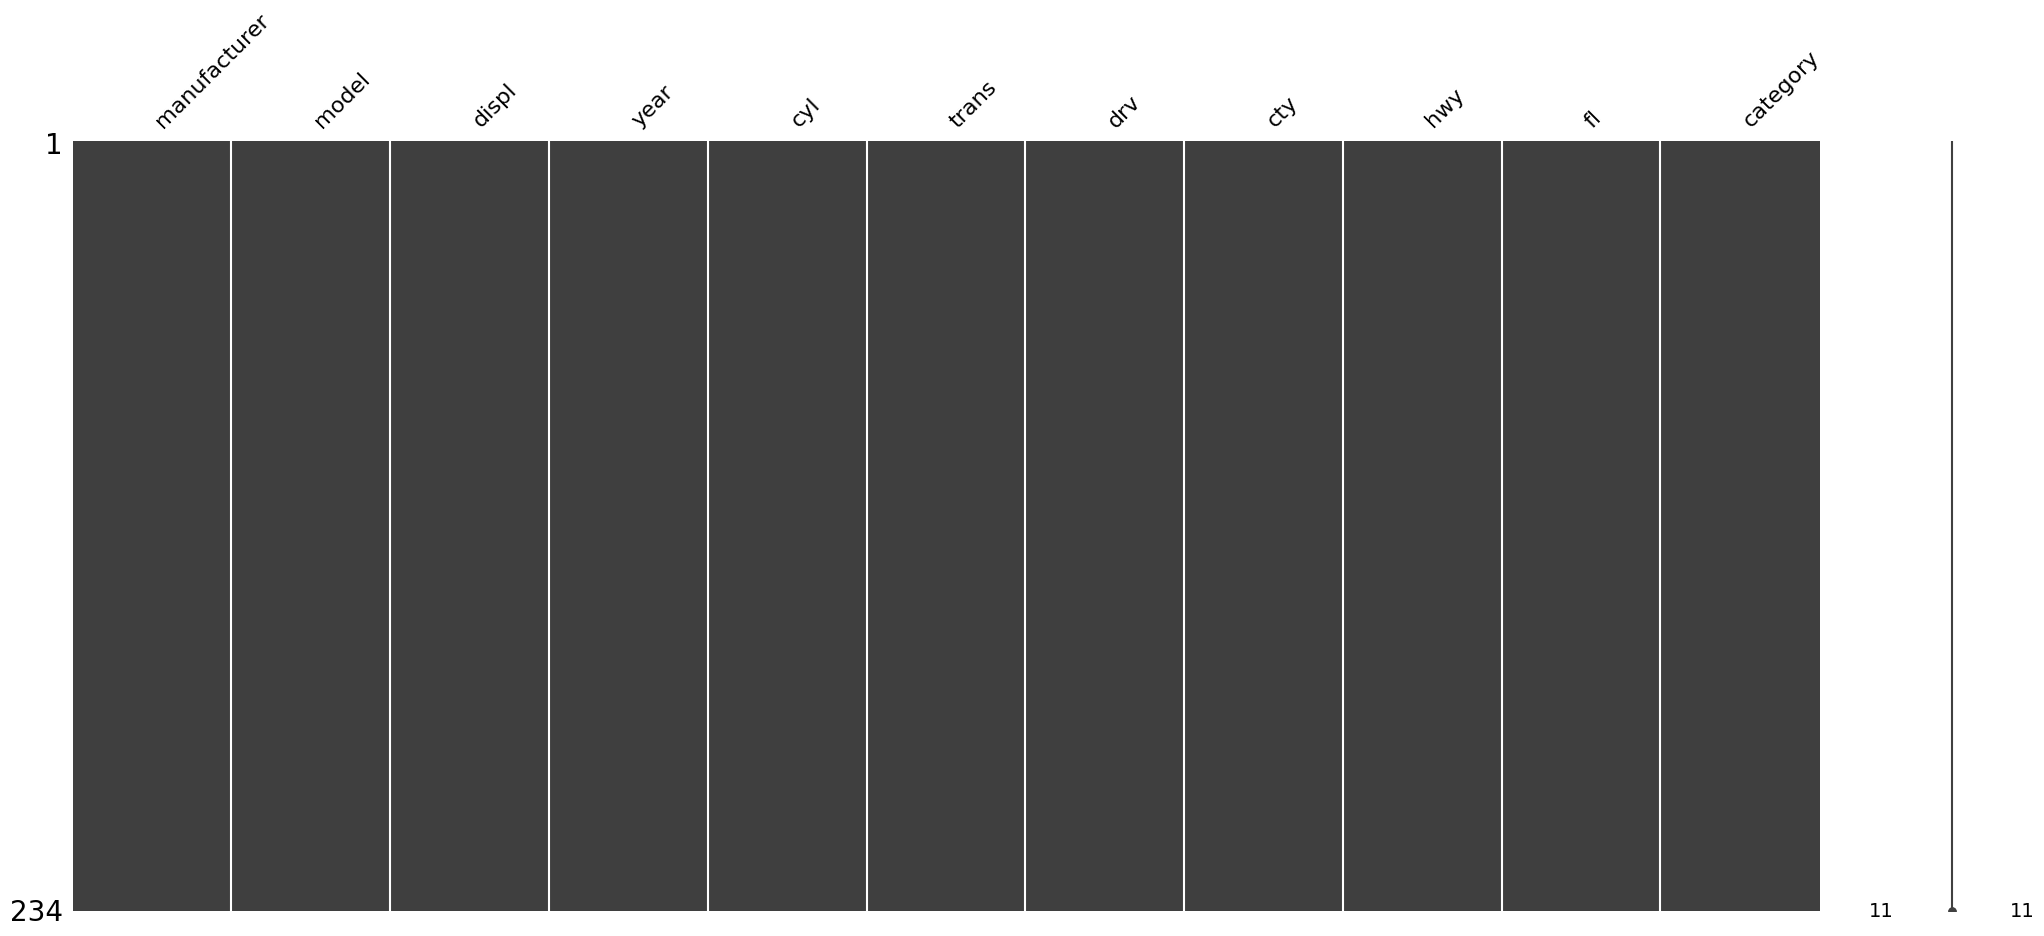

In [81]:
import missingno as msno
msno.matrix(mpg);

In [82]:
# 4.5 ~ 40.5 벗어나면 NaN 부여
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])

# 결측치 빈도 확인
mpg['hwy'].isna().sum()

np.int64(3)

In [83]:
dmpg = mpg.dropna(subset = ['hwy'])
len(dmpg)

231

In [84]:
# hwy 결측치 제거
# drv별 분리
# hwy 평균 구하기
dmpg.dropna(subset = ['hwy']).groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,27.73
r,21.00


In [85]:
dmpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,27.73
r,21.00


In [86]:
len(mpg)

234

In [87]:
mpg = pd.read_csv('data/mpg.csv')
mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,28.16
r,21.00


In [88]:
mpg[ mpg['hwy'] > 40.5 ]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [89]:
mpg.query( 'hwy > 40.5' )

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


<Axes: ylabel='hwy'>

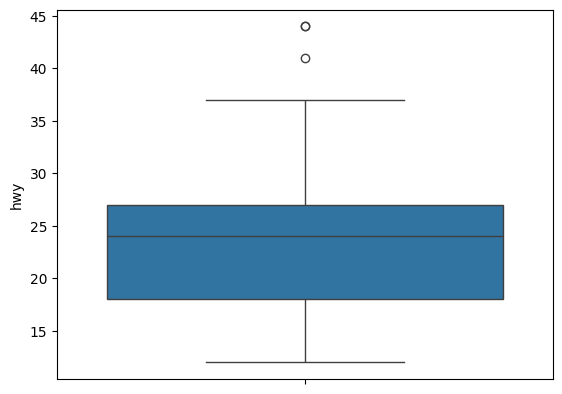

In [90]:
mpg = pd.read_csv('data/mpg.csv')

import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy')

In [91]:
def outlier_iqr(data, column):
    # lower, upper 글로벌 변수 선언하기
    global lower, upper

    # 4분위수 기준 지정하기
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)

    # IQR 계산하기
    iqr = q75 - q25

    # outlier cutoff 계산하기
    cut_off = iqr * 1.5

    # lower와 upper bound 값 구하기
    lower, upper = q25 - cut_off, q75 + cut_off

    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기
    data1 = data[data[column] > upper][column]
    data2 = data[data[column] < lower][column]
    print(data1)
    print(data2)
    print('\nIQR:',iqr, 'lower bound:', lower, 'upper bound:', upper)

    # 이상치 총 개수 구하기
    return print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')

In [92]:
outlier_iqr(mpg, "hwy")

212    44
221    44
222    41
Name: hwy, dtype: int64
Series([], Name: hwy, dtype: int64)

IQR: 9.0 lower bound: 4.5 upper bound: 40.5
총 이상치 개수는 3 이다.


In [93]:
#사분위수 구하기
q1 = mpg['hwy'].quantile(0.25)
q2 = mpg['hwy'].quantile(0.5)
q3 = mpg['hwy'].quantile(0.75)
q4 = mpg['hwy'].quantile(1)

# IQR값 구하기
iqr = q3-q1

#이상치값 구하기
mpg[(mpg['hwy'] < q1-1.5 * iqr) | (mpg['hwy'] > q3+1.5 * iqr)]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact
